# Logistic Regression
  
優點：  
1.資料不需要是線性可分  
2.可以知道是A類或B類的機率  
3.實務上執行速度非常快  
  
缺點：  
1.線的切法不夠漂亮  

In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 畫圖的時候，不需要用 .show() 就可以直接在 Jupyter notebook 呈現
%matplotlib inline 

In [4]:
# 印出 iris的資料集
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]
iris_data = iris_data[iris_data['target'].isin([0,1])]
iris_data.head(3)

target_names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0


In [5]:
# 通常建 model 的時候，會用 train_test_split() 函式把所有資料 7:3 分，其中 7 用來 train 資料，3 用來檢驗 model 做得如何
from sklearn.model_selection import train_test_split

In [7]:
# 用 train_test_split() 把資料切成 x_train, x_test, y_train, y_test
# 用 'sepal length (cm)', 'petal length (cm)' 特徵
x_train, x_test, y_train, y_test = train_test_split(
    iris_data[['sepal length (cm)', 'petal length (cm)']], iris_data[['target']], test_size=0.3, random_state=0)

In [6]:
x_train # 是隨機取的，所以會是亂數

,sepal length (cm),petal length (cm)
60,5.0,3.5
80,5.5,3.8
90,5.5,4.4
68,6.2,4.5
51,6.4,4.5
...,...,...
96,5.7,4.2
67,5.8,4.1
64,5.6,3.6
47,4.6,1.4


In [7]:
len(x_train)

70

In [8]:
x_test

,sepal length (cm),petal length (cm)
26,5.0,1.6
86,6.7,4.7
2,4.7,1.3
55,5.7,4.5
75,6.6,4.4
93,5.0,3.3
16,5.4,1.3
73,6.1,4.7
54,6.5,4.6
95,5.7,4.2


In [9]:
len(x_test)

30

In [10]:
# 必須把特徵範圍縮小到一樣的範圍，可以縮小到 0 到 1 之間，或是使用 StandardScaler 把資料標準化
# 標準化：(值 - 平均)/標準差
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [11]:
x_train_std

array([[-0.80800774,  0.43666598],
       [ 0.01648995,  0.64460217],
       [ 0.01648995,  1.06047453],
       [ 1.17078673,  1.12978659],
       [ 1.50058581,  1.12978659],
       [-0.47820866, -0.94957523],
       [ 0.34628903, -0.81095111],
       [ 1.33568627,  1.26841071],
       [ 1.00588719,  1.26841071],
       [ 1.50058581,  0.99116247],
       [-0.97290728, -1.01888729],
       [ 0.67608811,  0.92185041],
       [-1.79740498, -1.08819936],
       [-1.63250544, -1.08819936],
       [-0.80800774, -1.01888729],
       [ 0.34628903, -0.94957523],
       [-0.6431082 , -1.01888729],
       [-0.80800774, -1.08819936],
       [-1.79740498, -1.08819936],
       [-0.14840959, -0.81095111],
       [ 1.00588719,  1.19909865],
       [-0.47820866,  0.71391423],
       [-0.6431082 , -1.01888729],
       [-0.97290728, -0.94957523],
       [-0.47820866, -1.01888729],
       [ 2.48998304,  1.26841071],
       [-1.13780682, -0.88026317],
       [-0.80800774, -1.15751142],
       [-0.6431082 ,

In [12]:
# 用 Latex 寫 Logistic Regression 的 logistic function 函式
from IPython.display import Math
Math(r'z=w^Tx') 

<IPython.core.display.Math object>

In [13]:
Math(r'\phi{(z)}=\frac{1}{1+e^{-z}}')

<IPython.core.display.Math object>

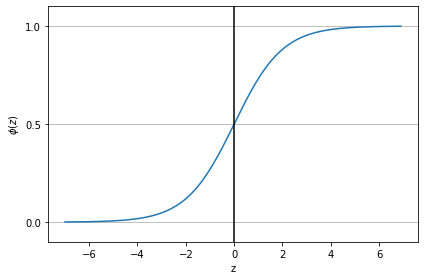

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Sigmoid 函式的圖形
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
# plt.savefig('./figures/sigmoid.png', dpi=300)
plt.show()

In [15]:
y_train['target'].values

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0])

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
# 使用 LogisticRegression 的時候，不需要設定任何參數
lr = LogisticRegression()
lr.fit(x_train_std,y_train['target'].values)

# 以上兩行就把 model train 完了

LogisticRegression()

In [18]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
C:\Users\cody8\AppData\Local\Temp\ipykernel_4724\2597727282.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


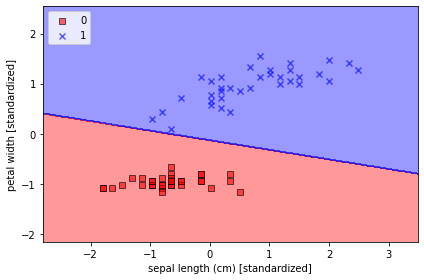

In [19]:
# model 也就是圖中，平面上的分割線
plot_decision_regions(x_train_std, y_train['target'].values, classifier=lr)
plt.xlabel('sepal length (cm) [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [20]:
lr.predict(x_test_std) # 預測

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

In [21]:
y_test['target'].values # 檢驗

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

In [22]:
# 寫一個迴圈檢測上面兩個 cell 的預測正確率如何
error = 0
# i 是 index，v 是 value
for i, v in enumerate(lr.predict(x_test_std)):
    if v != y_test['target'].values[i]:
        error+=1
print(error)

0


In [23]:
# 實際看預測的機率
lr.predict_proba(x_test_std)

array([[0.93606171, 0.06393829],
       [0.00497007, 0.99502993],
       [0.97297313, 0.02702687],
       [0.01892083, 0.98107917],
       [0.01007719, 0.98992281],
       [0.30602173, 0.69397827],
       [0.94913163, 0.05086837],
       [0.0086973 , 0.9913027 ],
       [0.00735109, 0.99264891],
       [0.03454645, 0.96545355],
       [0.06120019, 0.93879981],
       [0.04688146, 0.95311854],
       [0.01434288, 0.98565712],
       [0.9875209 , 0.0124791 ],
       [0.94733967, 0.05266033],
       [0.94642148, 0.05357852],
       [0.98655365, 0.01344635],
       [0.90494712, 0.09505288],
       [0.93254052, 0.06745948],
       [0.97489243, 0.02510757],
       [0.93606171, 0.06393829],
       [0.03916972, 0.96083028],
       [0.96322075, 0.03677925],
       [0.03578511, 0.96421489],
       [0.96386204, 0.03613796],
       [0.93138299, 0.06861701],
       [0.96986241, 0.03013759],
       [0.04211754, 0.95788246],
       [0.05699625, 0.94300375],
       [0.00368696, 0.99631304]])